In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

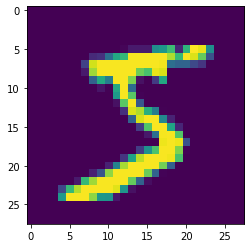

In [4]:
plt.imshow(xtrain[0])

In [5]:
ytrain==0

array([False,  True, False, ..., False, False, False])

In [6]:
only_zeros = xtrain[ytrain == 0]

In [7]:
only_zeros.shape

(5923, 28, 28)

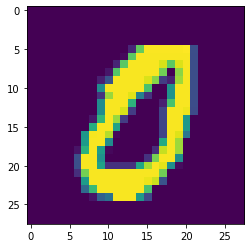

In [8]:
plt.imshow(only_zeros[10])

#### Creating the Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
import tensorflow as tf

In [11]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))

# output layer
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss="binary_crossentropy",optimizer='adam')

In [12]:
coding_size = 100

generator  =Sequential()
generator.add(Dense(coding_size,activation="relu",input_shape=[coding_size]))
generator.add(Dense(150,activation="relu"))
generator.add(Dense(784,activation="relu"))
generator.add(Reshape([28,28]))


In [27]:
GAN = Sequential([generator,discriminator])


In [28]:
discriminator.trainable = False

In [29]:
GAN.compile(loss="binary_crossentropy",optimizer='adam')

In [57]:
batch_size = 32

In [58]:
my_data = only_zeros

In [59]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)


In [60]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [61]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)


In [62]:
epochs = 1

In [63]:
# we can access only generator model or discriminator model

In [64]:
# generator
GAN.layers[0].summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               118384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [65]:
# descriminator
GAN.layers[1].summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 265,902
Trainable params: 132,951
Non-trainable params: 132,951
_________________________________________________________________


In [66]:
generator,discriminator = GAN.layers

In [67]:
for epoch in range(epochs):
    print(".")
    i = 0
    for batch in dataset:
        i = i+1
        # discriminator training images
        noise = tf.random.normal(shape=[batch_size,coding_size])
        
        gen_images = generator(noise)
        
        x_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(batch,tf.float32)],axis=0)
        
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
        
        discriminator.trainable = True
        
        discriminator.train_on_batch(x_fake_vs_real,y1)
        
        noise = tf.random.normal(shape=[batch_size, coding_size])
        
        y2 = tf.constant([[1.]] * batch_size)
        
        discriminator.trainable = False
        
        GAN.train_on_batch(noise, y2)
print("TRAINING COMPLETE") 

.
TRAINING COMPLETE


In [68]:
noise = tf.random.normal(shape=[10, coding_size])

In [69]:
noise.shape

TensorShape([10, 100])

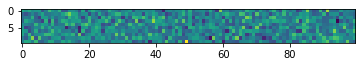

In [70]:
plt.imshow(noise)

In [71]:
image = generator(noise)

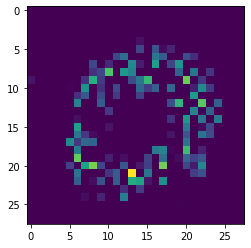

In [73]:
plt.imshow(image[1])